# Part 1

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt




def add_gaussian_noise(image, mean=0, sigma=20):
    noisy = image.astype(np.int16)
    for c in range(3):
        noise = np.random.normal(mean, sigma, image.shape[:2]).astype(np.int16)
        noisy[:, :, c] += noise
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

def otsu_threshold(image):
    hist = np.bincount(image.flatten(), minlength=256)
    total = image.size
    sum_total = np.dot(np.arange(256), hist)
    wB, muB = 0, 0
    wF, muF = 1, sum_total / total
    max_var, thresh = 0, 0
    for t in range(256):
        p_t = hist[t] / total
        wBn, wFn = wB + p_t, wF - p_t
        if wBn > 0:
            muB = (muB * wB + t * p_t) / wBn
        if wFn > 0:
            muF = (muF * wF - t * p_t) / wFn
        wB, wF = wBn, wFn
        var_between = wB * wF * (muB - muF)**2
        if var_between > max_var:
            max_var, thresh = var_between, t
    return thresh

(np.float64(-0.5), np.float64(199.5), np.float64(199.5), np.float64(-0.5))

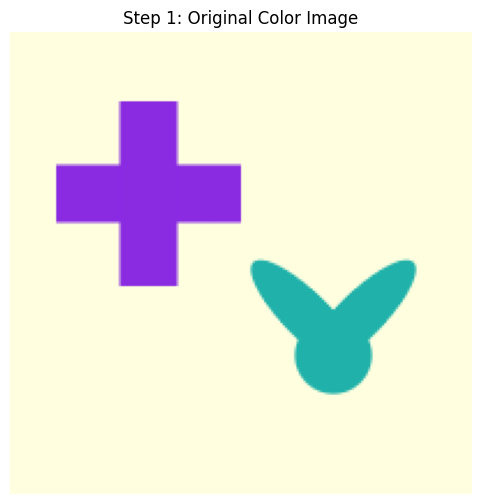

In [3]:

# Step 1

color_img=cv2.imread('input_img.png',cv2.IMREAD_COLOR)  
img_dis=cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(img_dis)
plt.title("Step 1: Original Color Image")
plt.axis("off")


(np.float64(-0.5), np.float64(199.5), np.float64(199.5), np.float64(-0.5))

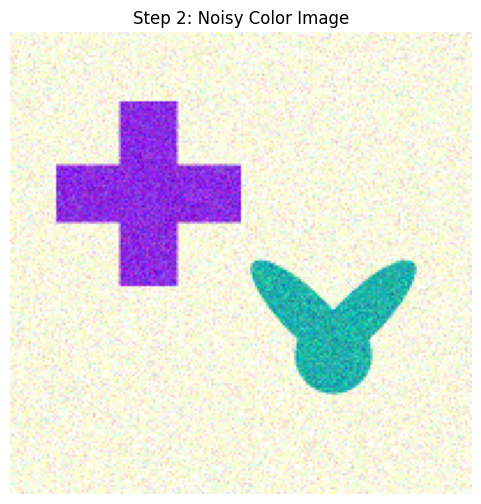

In [4]:
# Step 2
noisy_color = add_gaussian_noise(color_img)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(noisy_color, cv2.COLOR_BGR2RGB))
plt.title("Step 2: Noisy Color Image")
plt.axis("off")

(np.float64(-0.5), np.float64(199.5), np.float64(199.5), np.float64(-0.5))

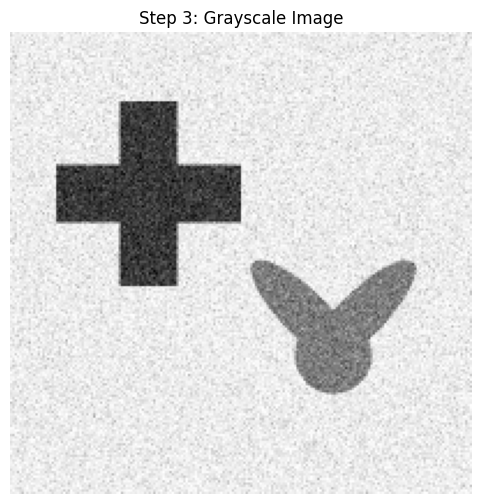

In [5]:
# Step 3
gray = cv2.cvtColor(noisy_color, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6, 6))
plt.imshow(gray, cmap='gray')
plt.title("Step 3: Grayscale Image")
plt.axis("off")

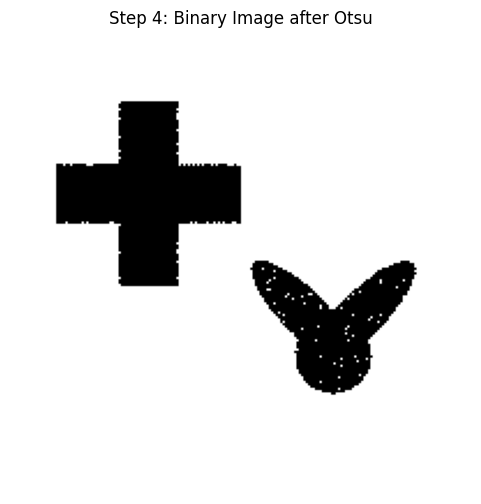

In [18]:
# Step 4
t = otsu_threshold(gray)
binary = (gray > t).astype(np.uint8) * 255
plt.figure(figsize=(6, 6))
plt.imshow(binary, cmap='gray')
plt.title("Step 4: Binary Image after Otsu")
plt.axis("off")
plt.show()

# Question 2

In [12]:
# Region Growing on Binary Image
def region_growing(img, seeds, tol):
    h, w, _ = img.shape
    mask = np.zeros((h, w), dtype=np.uint8)
    visited = np.zeros((h, w), dtype=bool)
    queue = list(seeds)
    
    for x, y in seeds:
        mask[x, y] = 255
        visited[x, y] = True
    
    while queue:
        x, y = queue.pop(0)
        current = img[x, y].astype(int)
        for dx in (-1, 0, 1):
            for dy in (-1, 0, 1):
                xn, yn = x + dx, y + dy
                if 0 <= xn < h and 0 <= yn < w and not visited[xn, yn]:
                    neigh = img[xn, yn].astype(int)
                    if np.linalg.norm(neigh - current) <= tol:
                        mask[xn, yn] = 255
                        queue.append((xn, yn))
                    visited[xn, yn] = True
    return mask


(np.float64(-0.5), np.float64(199.5), np.float64(199.5), np.float64(-0.5))

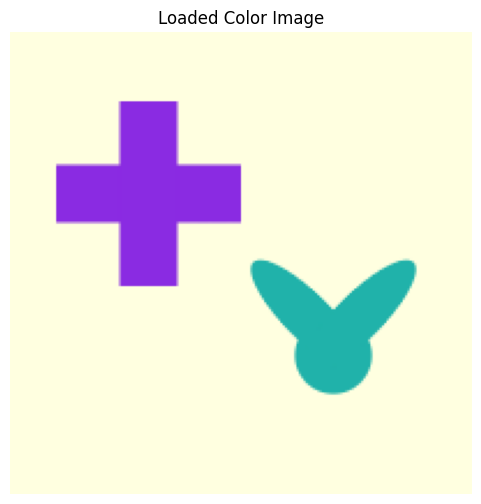

In [8]:

image_path = 'input_img.png'  
img_color_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
if img_color_bgr is None:
    raise FileNotFoundError(f"Image not found at {image_path}")
img_rgb = cv2.cvtColor(img_color_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("Loaded Color Image")
plt.axis('off')

(np.float64(-0.5), np.float64(199.5), np.float64(199.5), np.float64(-0.5))

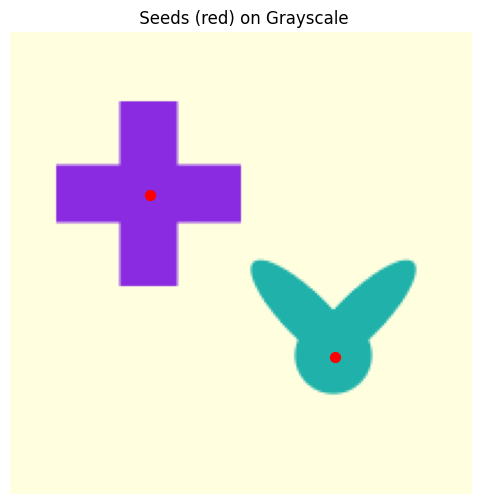

In [14]:

seeds = [(70, 60), (140, 140)] 
plt.figure(figsize=(6,6))
plt.imshow(img_rgb, cmap='gray')
plt.scatter([y for x, y in seeds], [x for x, y in seeds], c='red', s=50)
plt.title(" Seeds (red) on Grayscale")
plt.axis('off')

In [13]:

# Perform region-growing
tolerance = 20
mask = region_growing(img_rgb, seeds, tolerance)


(np.float64(-0.5), np.float64(199.5), np.float64(199.5), np.float64(-0.5))

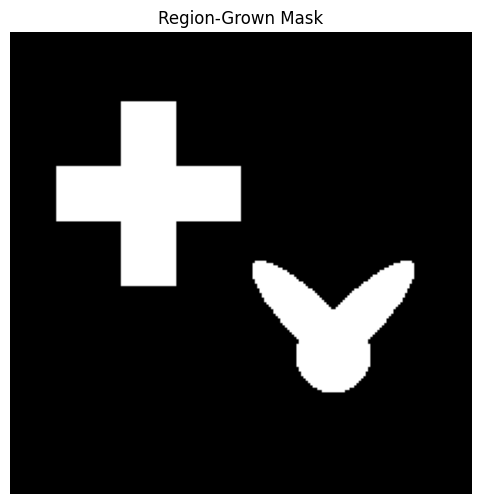

In [16]:
# Step 4: Display the binary mask result
plt.figure(figsize=(6,6))
plt.imshow(mask, cmap='gray')
plt.title("Region-Grown Mask")
plt.axis('off')


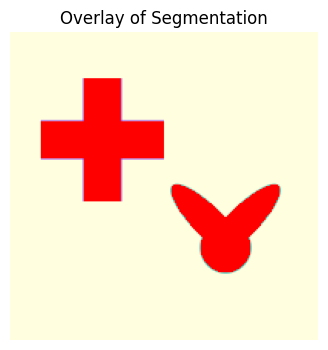

In [17]:
overlay = img_rgb.copy()
overlay[mask == 255] = [255, 0, 0] 

plt.figure(figsize=(4,4))
plt.imshow(overlay)
plt.title("Overlay of Segmentation")
plt.axis('off')

plt.show()